In [1]:
# GAN 모델을 이용해 단순히 랜덤한 숫자를 생성하는 것이 아닌
# 원하는 손글씨 숫자를 생성하는 모델
# 흑백사진을 컬러로 만든다던가, 선화를 채색한다든가 하는 응용이 가능
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot = True)

Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz


In [3]:
#######
# 옵션 설정
#######
total_epoch = 100
batch_size = 100
n_hidden = 256
n_input = 28 * 28
n_noise = 128
n_class = 10

In [4]:
#######
# 신경망 모델 구성
#######
X = tf.placeholder(tf.float32, [None, n_input])
# 노이즈와 실제 이미지에, 그에 해당하는 숫자에 대한 정보를 넣어주기 위해 사용
Y = tf.placeholder(tf.float32, [None, n_class])
Z = tf.placeholder(tf.float32, [None, n_noise])

def generator(noise, labels):
    with tf.variable_scope('generator'):
        # noise 값에 labels 정보 추가
        inputs = tf.concat([noise, labels], 1)
        
        # Tensorflow 에서 제공하는 유틸리티 함수를 통해 신경망 구성을 간단히 할 수 있음
        hidden = tf.layers.dense(inputs, n_hidden, activation=tf.nn.relu)
        output = tf.layers.dense(hidden, n_input, activation=tf.nn.sigmoid)
        
    return output

def discriminator(inputs, labels, reuse=None):
    with tf.variable_scope('discriminator') as scope:
        # 노이즈에서 생성한 이미지와 실제 이미지를 판별하는 모델의 변수를 동일하게 하기 위해
        # 이전에 사용되었던 변수 재사용
        
        if reuse:
            scope.reuse_variables()
            
        inputs = tf.concat([inputs, labels], 1)
        hidden = tf.layers.dense(inputs, n_hidden, activation=tf.nn.relu)
        output = tf.layers.dense(hidden, 1, activation=None)
        
    return output

def get_noise(batch_size, n_noise):
    return np.random.uniform(-1., 1., size=[batch_size, n_noise])

In [5]:
# 생성 모델과 판별 모델에 Y 즉, labels 정보를 추가하여 labels 정보에 해당하는 이미지를 생성하도록 유도
G = generator(Z,Y)
D_real = discriminator(X,Y)
D_gene = discriminator(G,Y,True)

# 손실함수 참고 : http://bamos.github.io/2016/08/09/deep-completion/
# 논문과 다름
# 진짜 이미지를 판별하는 D_real 값은 1에 가깝도록
# 가짜 이미지를 판별하는 D_gene 값은 0에 가깝도록
loss_D_real = tf.reduce_mean(
                    tf.nn.sigmoid_cross_entropy_with_logits(
                        logits=D_real, labels=tf.ones_like(D_real)))
loss_D_gene = tf.reduce_mean(
                    tf.nn.sigmoid_cross_entropy_with_logits(logits=D_gene, labels=tf.zeros_like(D_gene)))

# loss_D_real 과 loss_D_gene 을 더한 뒤 이 값을 최소화 하도록 최적화
loss_D = loss_D_real + loss_D_gene

# 가짜 이미지를 진짜에 가깝게 만들도록 생성망을 학습시키기 위해, D_gene 을 최대한 1에 가깝도록 만드는 손실함수
loss_G = tf.reduce_mean(
                    tf.nn.sigmoid_cross_entropy_with_logits(logits=D_gene, labels=tf.ones_like(D_gene)))

# Tensorflow 에서 제공하는 함수를 이용해 disrciminator 와 generator scope에서 사용된 변수들을 쉽게 가져올 수 있음.
vars_D = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, scope='discriminator')
vars_G = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, scope='generator')

train_D = tf.train.AdamOptimizer().minimize(loss_D, var_list = vars_D)
train_G = tf.train.AdamOptimizer().minimize(loss_G, var_list = vars_G)

Epoch: 0000 D loss: 0.008657 G loss: 8.974


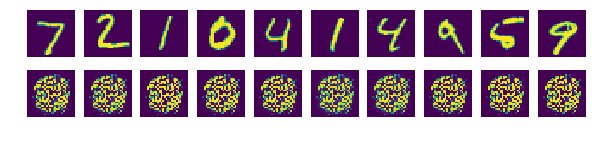

Epoch: 0001 D loss: 0.02495 G loss: 7.964
Epoch: 0002 D loss: 0.0333 G loss: 5.386
Epoch: 0003 D loss: 0.05426 G loss: 6.466
Epoch: 0004 D loss: 0.01262 G loss: 8.902
Epoch: 0005 D loss: 0.03052 G loss: 7.925
Epoch: 0006 D loss: 0.112 G loss: 7.495
Epoch: 0007 D loss: 0.06489 G loss: 6.691
Epoch: 0008 D loss: 0.1399 G loss: 7.892
Epoch: 0009 D loss: 0.11 G loss: 5.718


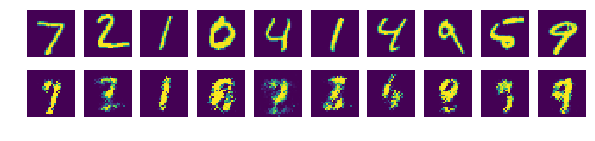

Epoch: 0010 D loss: 0.3033 G loss: 5.099
Epoch: 0011 D loss: 0.3979 G loss: 5.245
Epoch: 0012 D loss: 0.2434 G loss: 5.843
Epoch: 0013 D loss: 0.5053 G loss: 3.624
Epoch: 0014 D loss: 0.4186 G loss: 3.656
Epoch: 0015 D loss: 0.4828 G loss: 3.585
Epoch: 0016 D loss: 0.3599 G loss: 3.681
Epoch: 0017 D loss: 0.5465 G loss: 3.234
Epoch: 0018 D loss: 0.4641 G loss: 3.71
Epoch: 0019 D loss: 0.3815 G loss: 3.147


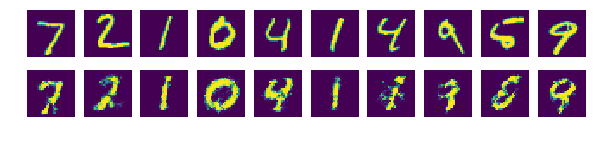

Epoch: 0020 D loss: 0.5048 G loss: 3.481
Epoch: 0021 D loss: 0.7619 G loss: 2.437
Epoch: 0022 D loss: 0.5703 G loss: 3.125
Epoch: 0023 D loss: 0.7533 G loss: 2.261
Epoch: 0024 D loss: 0.8202 G loss: 2.799
Epoch: 0025 D loss: 0.8114 G loss: 2.717
Epoch: 0026 D loss: 0.7273 G loss: 3.096
Epoch: 0027 D loss: 0.6702 G loss: 2.377
Epoch: 0028 D loss: 0.5677 G loss: 2.585
Epoch: 0029 D loss: 0.5722 G loss: 2.485


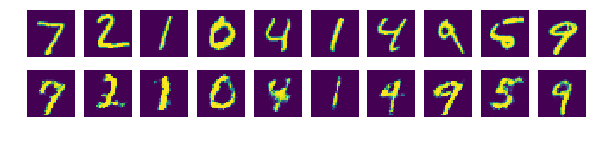

Epoch: 0030 D loss: 0.683 G loss: 2.576
Epoch: 0031 D loss: 0.6447 G loss: 2.827
Epoch: 0032 D loss: 0.6522 G loss: 2.226
Epoch: 0033 D loss: 0.6972 G loss: 2.347
Epoch: 0034 D loss: 0.5097 G loss: 2.555
Epoch: 0035 D loss: 0.7686 G loss: 2.37
Epoch: 0036 D loss: 0.6315 G loss: 2.458
Epoch: 0037 D loss: 0.6454 G loss: 2.335
Epoch: 0038 D loss: 0.6395 G loss: 2.155
Epoch: 0039 D loss: 0.6277 G loss: 2.38


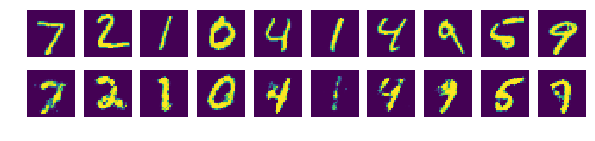

Epoch: 0040 D loss: 0.6302 G loss: 2.371
Epoch: 0041 D loss: 0.6321 G loss: 2.169
Epoch: 0042 D loss: 0.7057 G loss: 2.32
Epoch: 0043 D loss: 0.67 G loss: 2.454
Epoch: 0044 D loss: 0.6485 G loss: 2.195
Epoch: 0045 D loss: 0.62 G loss: 2.417
Epoch: 0046 D loss: 0.8275 G loss: 2.239
Epoch: 0047 D loss: 0.7184 G loss: 2.13
Epoch: 0048 D loss: 0.7514 G loss: 2.175
Epoch: 0049 D loss: 0.6189 G loss: 2.535


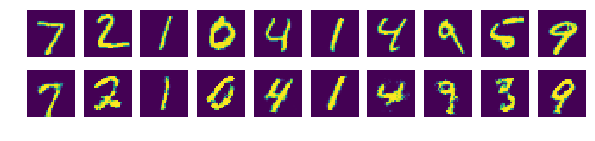

Epoch: 0050 D loss: 0.6535 G loss: 2.11
Epoch: 0051 D loss: 0.7545 G loss: 2.246
Epoch: 0052 D loss: 0.7978 G loss: 2.145
Epoch: 0053 D loss: 0.682 G loss: 2.378
Epoch: 0054 D loss: 0.6756 G loss: 2.185
Epoch: 0055 D loss: 0.6934 G loss: 1.963
Epoch: 0056 D loss: 0.6578 G loss: 1.845
Epoch: 0057 D loss: 0.7711 G loss: 2.484
Epoch: 0058 D loss: 0.7432 G loss: 2.297
Epoch: 0059 D loss: 0.6372 G loss: 2.028


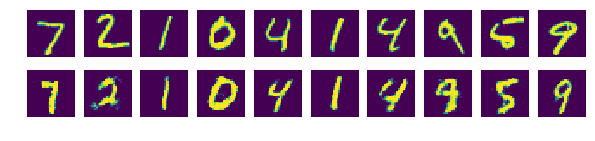

Epoch: 0060 D loss: 0.7723 G loss: 2.264
Epoch: 0061 D loss: 0.7123 G loss: 2.27
Epoch: 0062 D loss: 0.6787 G loss: 1.798
Epoch: 0063 D loss: 0.584 G loss: 2.117
Epoch: 0064 D loss: 0.6692 G loss: 2.078
Epoch: 0065 D loss: 0.5904 G loss: 2.049
Epoch: 0066 D loss: 0.7917 G loss: 2.123
Epoch: 0067 D loss: 0.551 G loss: 2.394
Epoch: 0068 D loss: 0.7 G loss: 2.293
Epoch: 0069 D loss: 0.6498 G loss: 2.51


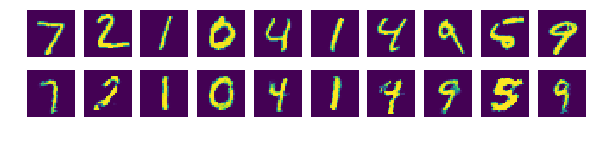

Epoch: 0070 D loss: 0.7445 G loss: 2.111
Epoch: 0071 D loss: 0.8166 G loss: 2.195
Epoch: 0072 D loss: 0.6637 G loss: 1.921
Epoch: 0073 D loss: 0.5749 G loss: 1.982
Epoch: 0074 D loss: 0.6181 G loss: 1.957
Epoch: 0075 D loss: 0.6228 G loss: 2.106
Epoch: 0076 D loss: 0.6956 G loss: 2.132
Epoch: 0077 D loss: 0.6438 G loss: 2.191
Epoch: 0078 D loss: 0.7519 G loss: 2.233
Epoch: 0079 D loss: 0.6471 G loss: 2.275


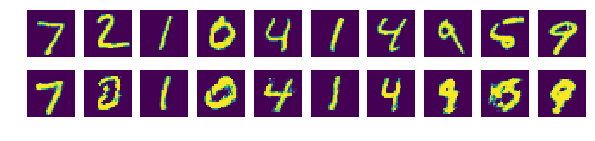

Epoch: 0080 D loss: 0.7114 G loss: 1.965
Epoch: 0081 D loss: 0.5778 G loss: 2.5
Epoch: 0082 D loss: 0.4388 G loss: 2.69
Epoch: 0083 D loss: 0.6726 G loss: 2.09
Epoch: 0084 D loss: 0.6783 G loss: 1.97
Epoch: 0085 D loss: 0.6482 G loss: 2.144
Epoch: 0086 D loss: 0.9008 G loss: 1.995
Epoch: 0087 D loss: 0.5801 G loss: 2.011
Epoch: 0088 D loss: 0.4815 G loss: 2.449
Epoch: 0089 D loss: 0.7007 G loss: 2.143


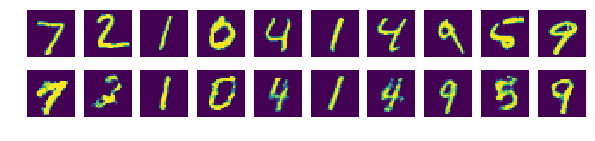

Epoch: 0090 D loss: 0.6517 G loss: 2.091
Epoch: 0091 D loss: 0.6187 G loss: 1.973
Epoch: 0092 D loss: 0.6556 G loss: 2.211
Epoch: 0093 D loss: 0.6438 G loss: 2.032
Epoch: 0094 D loss: 0.6761 G loss: 1.918
Epoch: 0095 D loss: 0.5688 G loss: 2.049
Epoch: 0096 D loss: 0.6573 G loss: 2.226
Epoch: 0097 D loss: 0.7029 G loss: 2.345
Epoch: 0098 D loss: 0.7767 G loss: 2.244
Epoch: 0099 D loss: 0.6677 G loss: 2.265


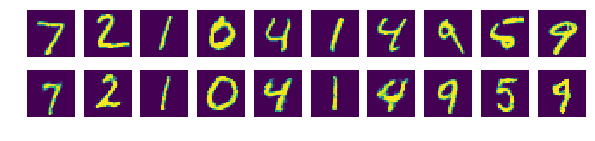

최적화 완료


In [8]:
#######
# 신경망 모델 학습
#######
sess = tf.Session()
sess.run(tf.global_variables_initializer())

total_batch = int(mnist.train.num_examples / batch_size)
loss_val_D, loss_val_G = 0, 0

for epoch in range(total_epoch):
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        noise = get_noise(batch_size, n_noise)
        
        _, loss_val_D = sess.run([train_D, loss_D], feed_dict={X: batch_xs, Y: batch_ys, Z: noise})
        _, loss_val_G = sess.run([train_G, loss_G], feed_dict={Y: batch_ys, Z: noise})
        
    print('Epoch:', '%04d' % epoch,'D loss: {:.4}'.format(loss_val_D),'G loss: {:.4}'.format(loss_val_G))
        
    
    if epoch == 0 or (epoch+1) % 10 == 0:
        sample_size = 10
        noise = get_noise(sample_size, n_noise)
        samples = sess.run(G, feed_dict={Y: mnist.test.labels[:sample_size], Z: noise})
        
        fig, ax = plt.subplots(2, sample_size, figsize=(sample_size, 2))
        
        for i in range(sample_size):
            ax[0][i].set_axis_off()
            ax[1][i].set_axis_off()
            
            ax[0][i].imshow(np.reshape(mnist.test.images[i], (28,28)))
            ax[1][i].imshow(np.reshape(samples[i], (28,28)))
        
        plt.show(fig)
        
print('최적화 완료')